# 从零开始实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [3]:
# w&b
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True) * 0.01) #方差改为0.01防止参数过大
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
params = [W1, b1, W2, b2]

In [4]:
# relu激活
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

In [5]:
# 模型;使⽤reshape将每个⼆维图像转换为⼀个⻓度为num_inputs的向量
def net(X):
    X = X.reshape((-1,num_inputs)) # 这⾥“@”代表矩阵乘法
    H = relu(X@W1+b1)
    return (H@W2+b2)

In [6]:
# 交叉熵损失函数
loss = nn.CrossEntropyLoss()

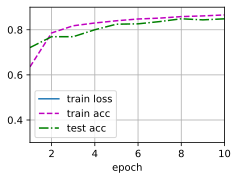

In [7]:
# train
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)

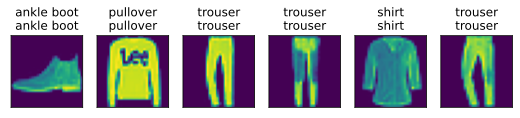

In [8]:
# 将在⼀些测试数据上应⽤这个模型
d2l.predict_ch3(net, test_iter)

⼩结   
• ⼿动实现⼀个简单的多层感知机是很容易的。然而如果有⼤量的层，从零开始实现多层感知机会变得    
很⿇烦（例如，要命名和记录模型的参数）。

练习
1. 在所有其他参数保持不变的情况下，更改超参数num_hiddens的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
2. 尝试添加更多的隐藏层，并查看它对结果有何影响。
3. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？
4. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进⾏联合优化，可以得到的最佳结果是什么？
5. 描述为什么涉及多个超参数更具挑战性。
6. 如果要构建多个超参数的搜索⽅法，你能想到的最聪明的策略是什么？

1.2.3.    
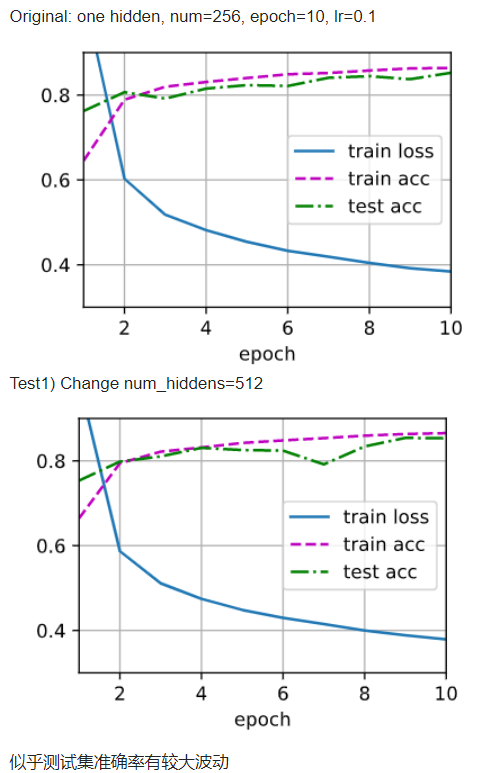
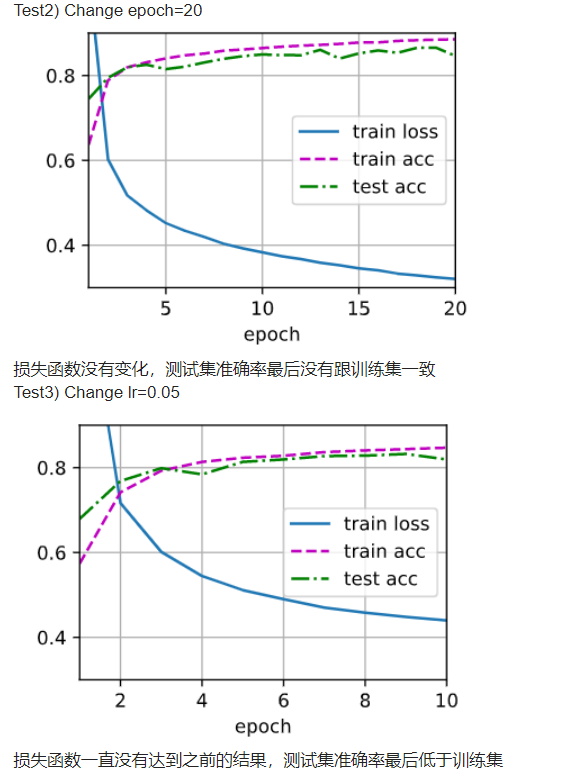
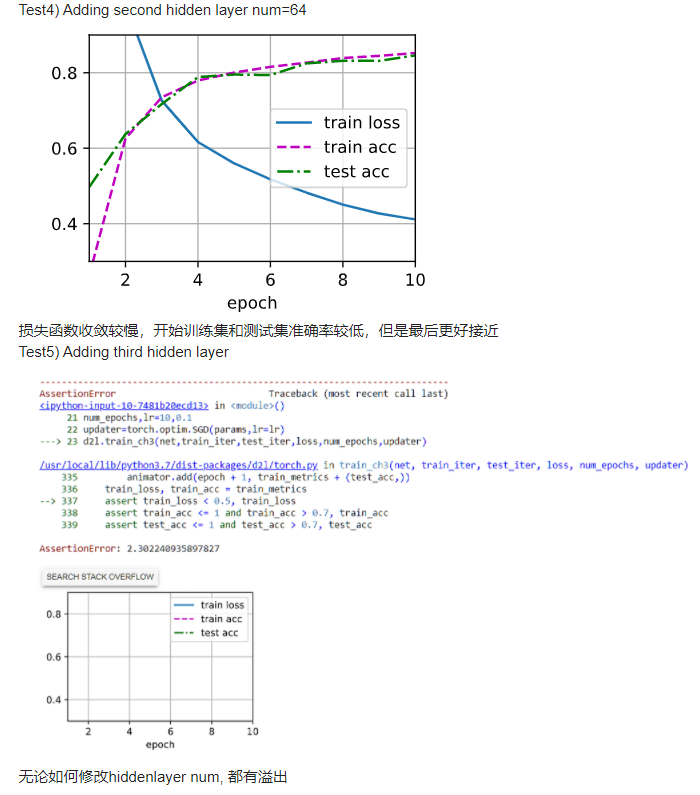

4.效果最好   
5.6. 我的想法是如果调单一超参数的情况下复杂度是N，那么联合m个超参的复杂度就是N**m。但是好像部分超参数会有关联，比如batchsize和lr，在降低batchsize的同时提高lr。会得到不错的效果。关于问题6很希望得到大家的建议，目前我想到的办法是：在调整某个超参的时候，保证别的参数不变，当得到较优数值后再迭代的调别的参数。这样复杂度就是N*M，但是有个疑问，不能保证最后得到的结果是最好的，比如lr在不同batchsize上有不同的最优值。

# 多层感知机的简洁实现

In [9]:
net = nn.Sequential(nn.Flatten(),
                nn.Linear(784, 256),
                nn.ReLU(),
                nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
        
net.apply(init_weights);#apply(fn)的官网介绍，该方法会将fn递归的应用于模块的每一个子模块

In [10]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

In [ ]:
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

⼩结     
• 我们可以使⽤⾼级API更简洁地实现多层感知机。    
• 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是多层感知机的实现⾥增加了带有激活函数的隐藏层。

练习
1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？
2. 尝试不同的激活函数，哪个效果最好？
3. 尝试不同的⽅案来初始化权重，什么⽅法效果最好？

1. 略
2. 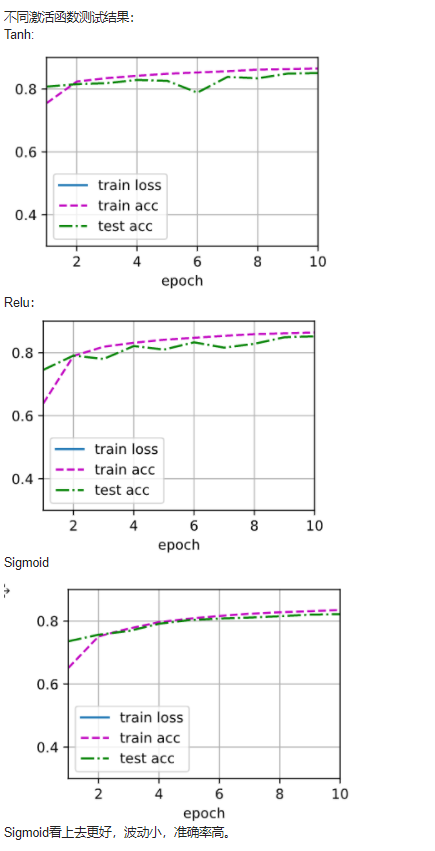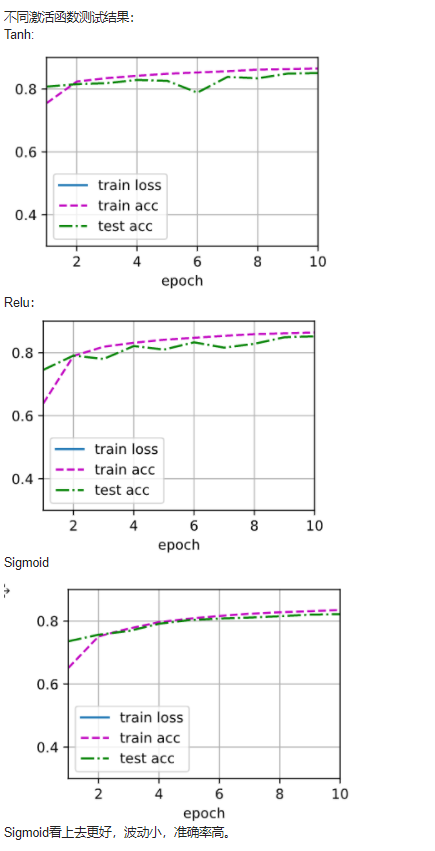
3. 正太分布较好